### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


### Best Practices for Notebook

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 Submission Guidelines :

The submission should be: well commented Jupyter notebook [format - .HTML and .ipynb]
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
Happy Learning!!

#### Perform an Exploratory Data Analysis on the data

- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive

In [448]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

In [481]:
#Loading the data.
bank_data = pd.read_csv("BankChurners.csv")

In [482]:
# View first five rows of dataframe to check whether excel sheet is loaded or not
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000


In [483]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Observation
- Total no of columns in the dataset is 21. 10 columns are int, 6 columns are Object & 5 are float. 
- Total no of rows is 10127.


In [484]:
# Replacing Attrition Flag values with 1 and 0 for Attritued and Existing customer respectively.
bank_data['Attrition_Flag'].replace(['Attrited Customer','Existing Customer'], [1,0],inplace=True)
bank_data['Attrition_Flag'] = bank_data['Attrition_Flag'].astype(int)

In [285]:
bank_data.head(50)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000
5,713061558,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.000000,1247,2763.000000,1.376000,1088,24,0.846000,0.311000
6,810347208,0,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.000000,2264,32252.000000,1.975000,1330,31,0.722000,0.066000
7,818906208,0,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.000000,1396,27685.000000,2.204000,1538,36,0.714000,0.048000
8,710930508,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.000000,2517,19835.000000,3.355000,1350,24,1.182000,0.113000
9,719661558,0,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.000000,1677,9979.000000,1.524000,1441,32,0.882000,0.144000


In [286]:
# Code to understand null values in the data.
bank_data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Observation
No data have null values

In [287]:
# Statistical summary of the data.
pd.set_option('float_format', '{:f}'.format)
bank_data[['CLIENTNUM', 'Attrition_Flag','Customer_Age','Dependent_count',
            'Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',
            'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
            'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000000,739177606.333663,36903783.450231,708082083.000000,713036770.500000,717926358.000000,773143533.000000,828343083.000000
Attrition_Flag,10127.000000,0.160660,0.367235,0.000000,0.000000,0.000000,0.000000,1.000000
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000


#### Insights from the statistical summary, following are the observations.
- CLIENTNUM is a continous columns with unique entries. 
- 'Attrition_Flag', 'Gender','Dependent_count','Education_Level','Marital_Status',
          'Income_Category', 'Card_Category', 'Total_Relationship_Count appears to be categorical columns
- Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy',
           'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
           'Avg_Utilization_Ratio' appears to be continuous numerical columns

In [288]:
bank_data.nunique()
print(len(bank_data))

10127


In [222]:
#Create a list with columns that categorical values
cat_cols=['Attrition_Flag', 'Gender','Dependent_count','Education_Level','Marital_Status',
          'Income_Category', 'Card_Category', 'Total_Relationship_Count']


#Create a list with columns that numerical values
cont_cols = ['Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy',
           'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
           'Avg_Utilization_Ratio']

In [289]:
# Deleting CLIENTNUM column from dataframe as it's a continuous numerical unique column
bank_data.drop(columns='CLIENTNUM',axis=0, inplace=True)

In [290]:
# Printing value colunts of each categorical columns
for i in bank_data[cat_cols].columns:
    print(str(bank_data[i].value_counts()))

0    8500
1    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64


#### Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive

In [291]:
# Defining a function for cateogrical graph
def categorical_unigraphs(features):
    for i in bank_data[features].columns:
        #sns.barplot(tour_data[i].value_counts().index,tour_data[i].value_counts()).set_title(i)
        graph = sns.barplot(bank_data[i].value_counts().index,
                    (bank_data[i].value_counts()/len(bank_data)*100)).set_title(i)
        plt.ylim(0,100)
        plt.show()

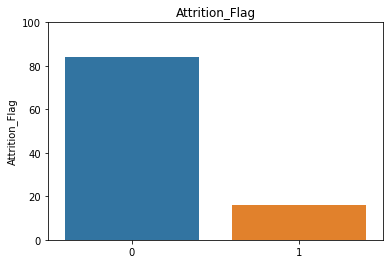

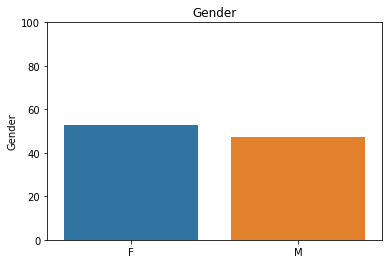

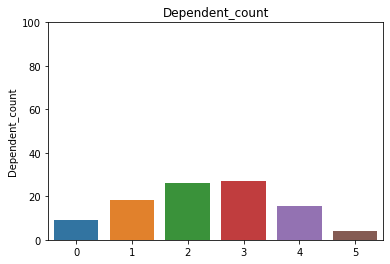

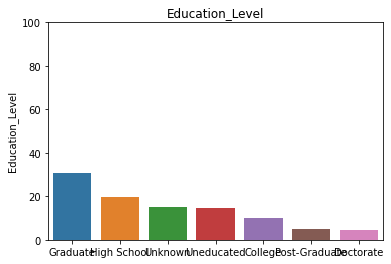

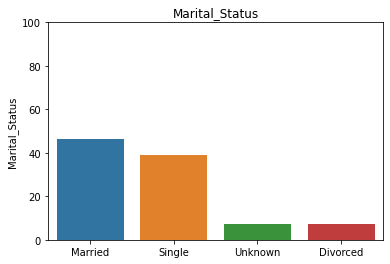

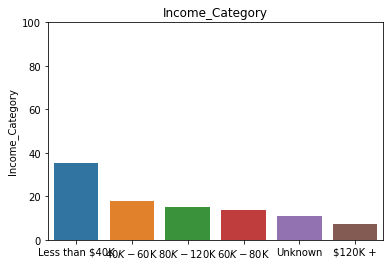

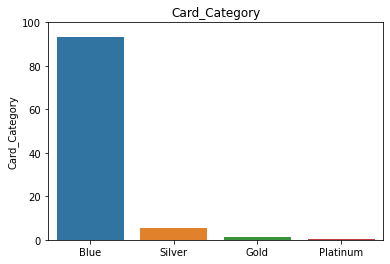

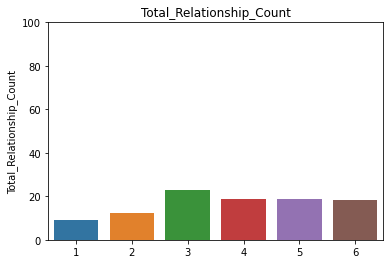

In [292]:
# Calling function to print graphs
categorical_unigraphs(cat_cols)

#### Observation 
- 80% customers are existing customers and 20% have attrited. 
- Male and female population is almost equally distributed. 
- 90% customers are blue customers.

In [293]:
# Univariate analysis for Continous Columns.
def continous_unigraphs(features):
    for i in bank_data[features].columns:
        sns.boxplot(bank_data[i], showmeans=True)
        plt.show()
        sns.histplot(data=bank_data, x= i , kde=True)
        plt.show()

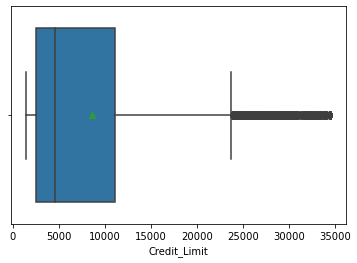

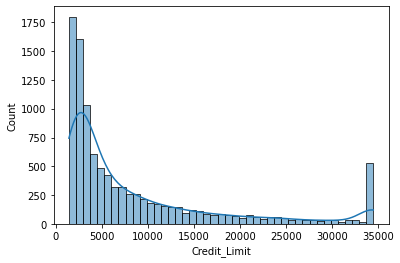

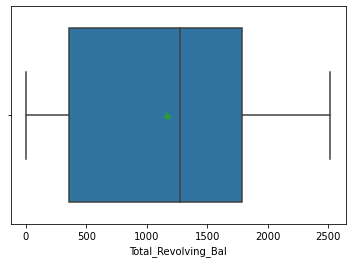

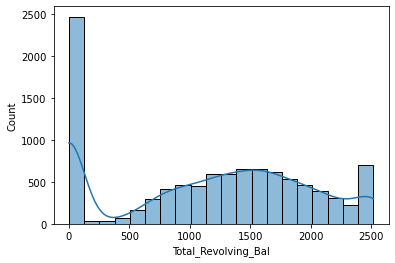

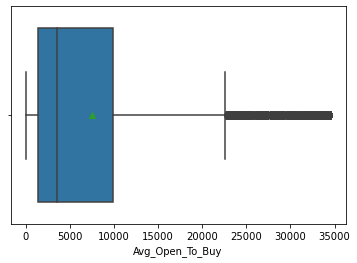

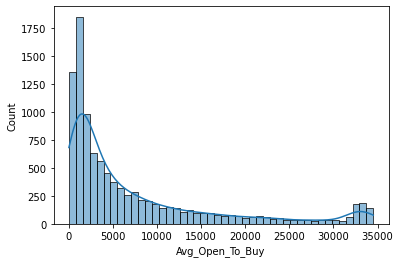

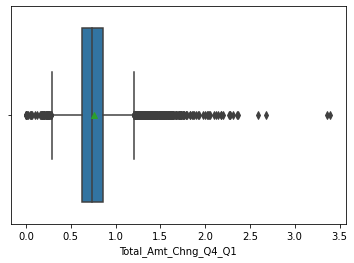

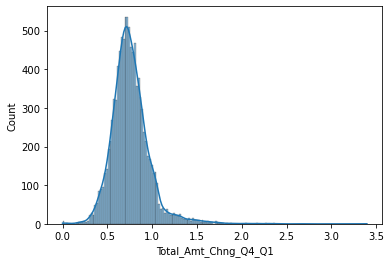

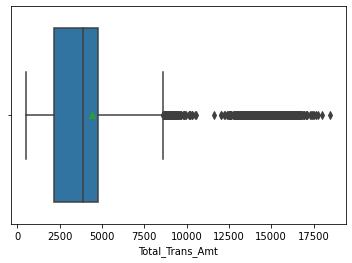

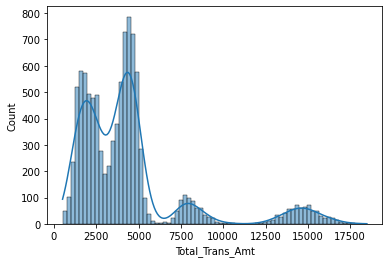

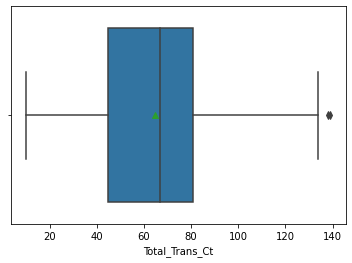

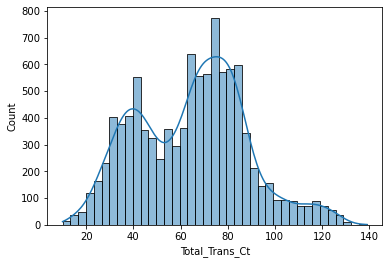

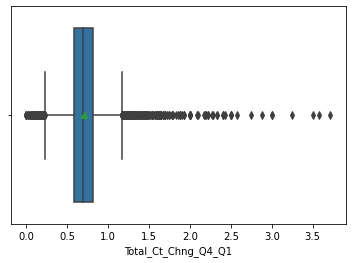

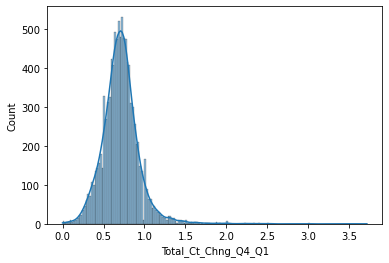

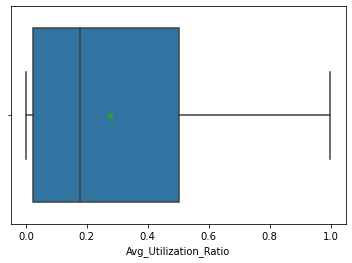

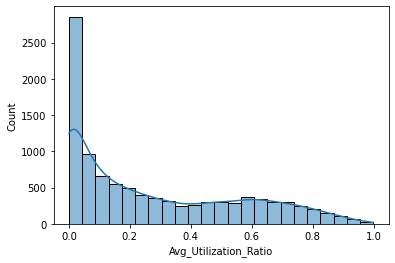

In [294]:
# Call function to print univariate graphs for continous features .
continous_unigraphs(cont_cols)

In [295]:
#Bivariate analysis of the data
def prodtaken_bivariate(feature):
    total = bank_data.groupby(by=feature)['Attrition_Flag'].count().reset_index()
    Attried_No = (bank_data[bank_data['Attrition_Flag']==0]).groupby(by=feature)['Attrition_Flag'].count().reset_index()

    #print(total)
    bar1 = sns.barplot(x= feature,  y='Attrition_Flag', data=total, color='red')
    bar2 = sns.barplot(x=feature, y='Attrition_Flag', data=Attried_No, color='green')

    
    top_bar = mpatches.Patch(color='red', label='Attrition_Flag = 1')
    bottom_bar = mpatches.Patch(color='green', label='Attrition_Flag = 0')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.show()

Gender


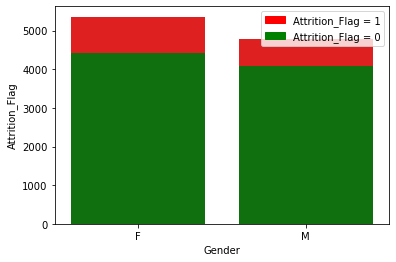

Dependent_count


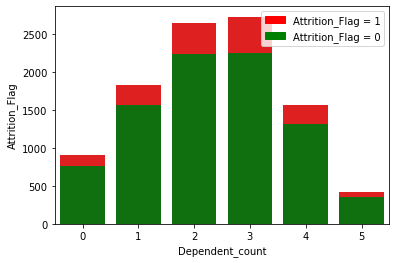

Education_Level


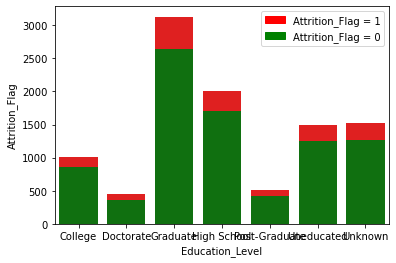

Marital_Status


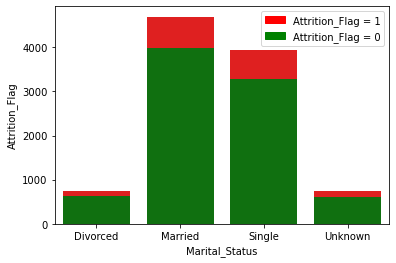

Income_Category


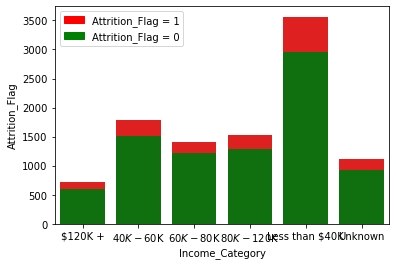

Card_Category


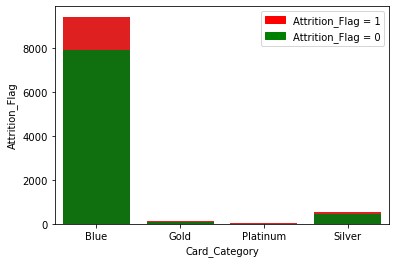

Total_Relationship_Count


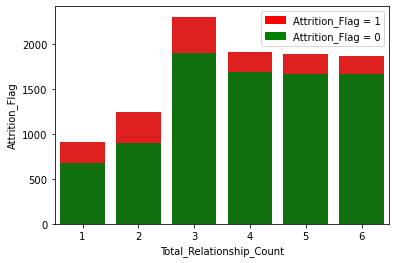

In [296]:
# Iterate each category columns to print bivariate graph.
for i in bank_data[cat_cols].columns:
    if i != 'Attrition_Flag':
        print(i)
        prodtaken_bivariate(i)

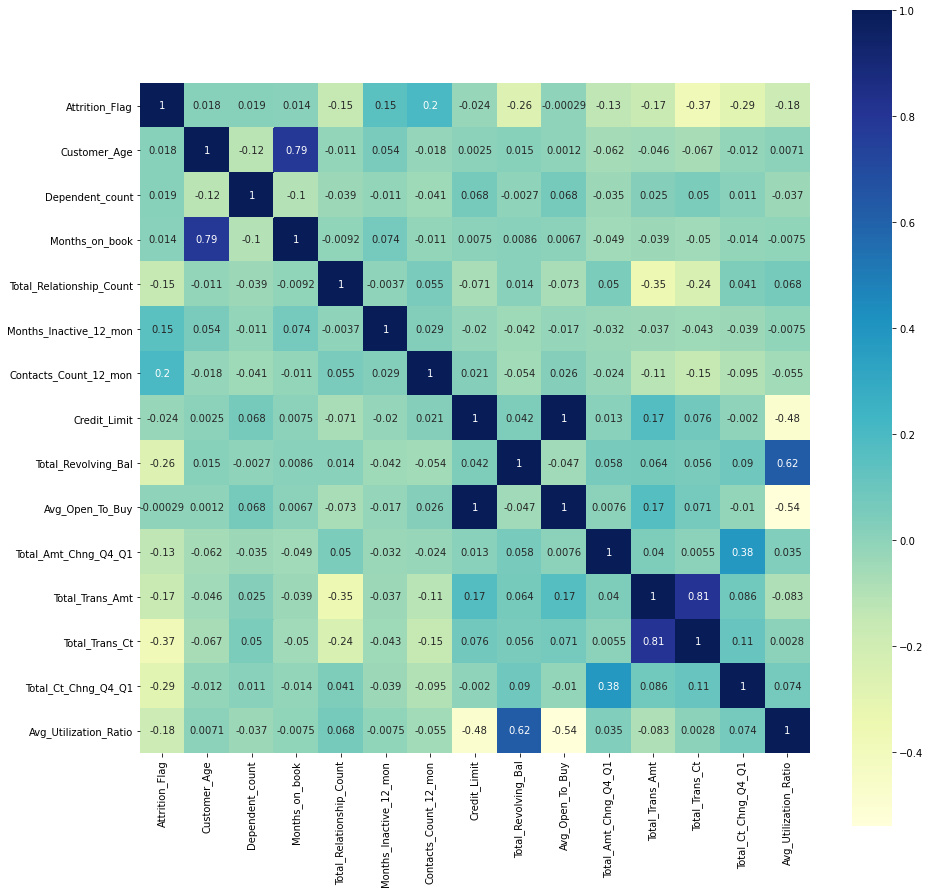

In [297]:
# Print correlation graph
plt.figure(figsize=(15,15))
sns.heatmap(bank_data.corr(),annot=True, cmap="YlGnBu", square=True);

#### Observation 
- High correlation between following features. Total_Trans_Ct and Total_Trans_Amt, Avg_Utilization_Ratio and Total_Revolving_Balance, Months on books and customer age.

In [298]:
#Printing count of NA in each columns
bank_data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [299]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

#### Data Pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

Missing value Treatment

There are no missing value in the data.

Outlier Detection

In [486]:
# Function to impute outliers
def outlier_imputer(df,feature):
    q1 = df[feature].quantile(0.25) #first quartile value
    q3 = df[feature].quantile(0.75) # third quartile value
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    df = df[(df[feature] >= low) & (df[feature] <= high)] # meeting the acceptable range
    return df

In [487]:
# Function to detect outliers
def outlier_detection(df,features):
    for i in df[features].columns:
        print("Before Outlier Imputation Box plot")
        sns.boxplot(df[i], showmeans=True)
        plt.show()
        df = outlier_imputer(df, i)
        print("Post Outlier Imputation Box plot")
        sns.boxplot(df[i], showmeans=True)
        plt.show()
    return df

Before Outlier Imputation Box plot


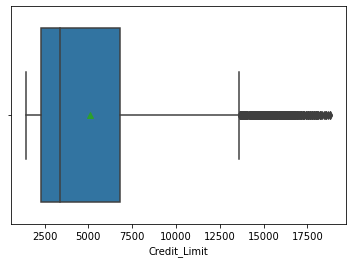

Post Outlier Imputation Box plot


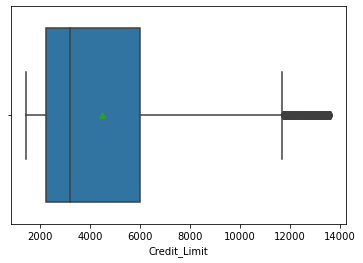

Before Outlier Imputation Box plot


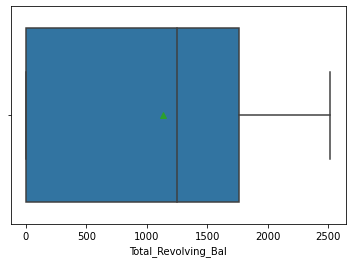

Post Outlier Imputation Box plot


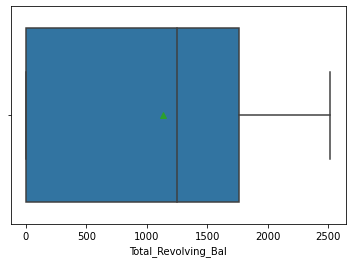

Before Outlier Imputation Box plot


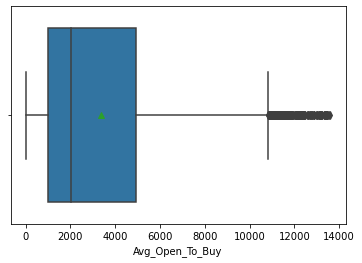

Post Outlier Imputation Box plot


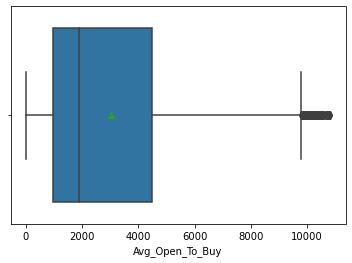

Before Outlier Imputation Box plot


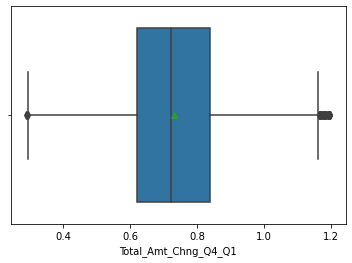

Post Outlier Imputation Box plot


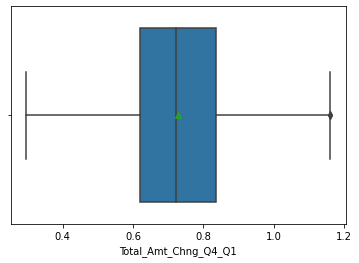

Before Outlier Imputation Box plot


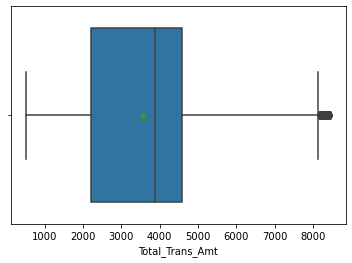

Post Outlier Imputation Box plot


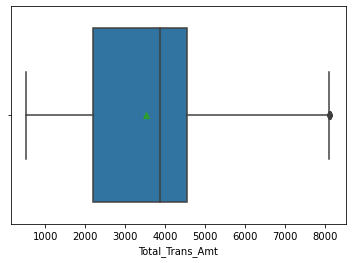

Before Outlier Imputation Box plot


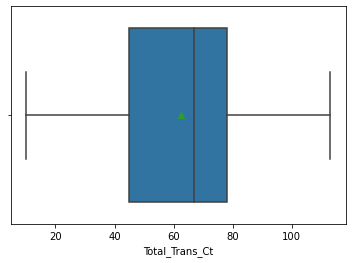

Post Outlier Imputation Box plot


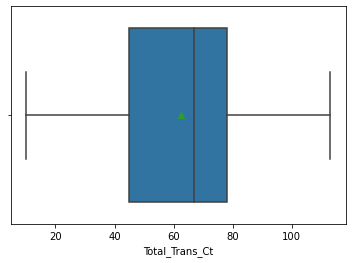

Before Outlier Imputation Box plot


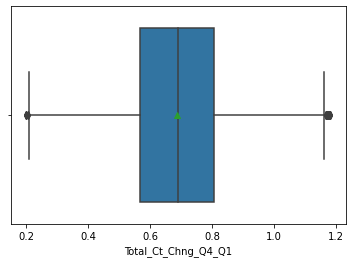

Post Outlier Imputation Box plot


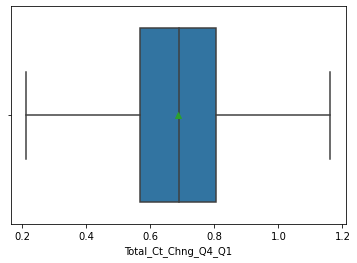

Before Outlier Imputation Box plot


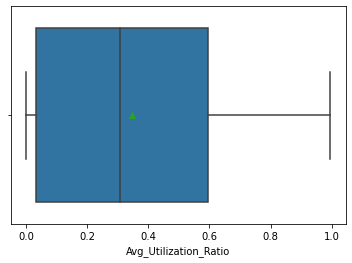

Post Outlier Imputation Box plot


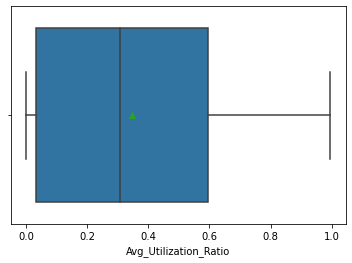

In [489]:
# Removing outlier in DurationOfPitch as it not going as it's a one off case.
bank_data = outlier_detection(bank_data, cont_cols)

In [490]:
# Creating a dictionary to replace str values with categorical number values.
replaceStruct = {
                "Gender": {"M": 0, "F": 1},
                "Education_Level": {"Uneducated": 0, "High School":1 , "Graduate": 2, "College": 3, "Post-Graduate": 4, "Doctorate": 5, "Unknown":9},
                "Marital_Status": {"Single": 0, "Married":1 , "Married": 3,"Divorced":4, "Unknown":9},
                "Income_Category": {"Less than $40K": 0, "$40K - $60K": 1 ,"$80K - $120K": 2 ,"$60K - $80K": 3 ,"$120K +": 4, "Unknown":9},
                "Card_Category": {"Blue": 0, "Silver": 1 ,"Gold": 2 ,"Platinum": 3}
                }

In [491]:
# Replace dataframe structure with dictionary created above
bank_data=bank_data.replace(replaceStruct)

In [492]:
bank_data.head(100)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,708790833,0,42,0,5,0,9,4,0,31,...,3,2,6748.000000,1467,5281.000000,0.831000,1201,42,0.680000,0.217000
21,708508758,1,62,1,0,2,3,0,0,49,...,3,3,1438.300000,0,1438.300000,1.047000,692,16,0.600000,0.000000
23,811604133,0,47,1,4,9,0,0,0,36,...,3,2,2492.000000,1560,932.000000,0.573000,1126,23,0.353000,0.626000
25,771071958,0,41,1,3,2,0,0,0,28,...,1,2,7768.000000,1669,6099.000000,0.797000,1051,22,0.833000,0.215000
27,804424383,0,63,0,1,9,3,3,0,56,...,3,2,10215.000000,1010,9205.000000,0.843000,1904,40,1.000000,0.099000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,720997383,1,52,0,1,0,3,2,0,36,...,3,3,1857.000000,1833,24.000000,0.723000,829,17,0.700000,0.987000
238,709930758,0,41,0,2,0,3,1,0,30,...,3,3,11107.000000,1222,9885.000000,0.538000,1506,33,0.941000,0.110000
240,710299608,1,53,1,2,9,3,0,0,33,...,3,3,2859.000000,2517,342.000000,0.993000,817,30,0.667000,0.880000
241,710741208,0,39,0,2,1,0,2,0,36,...,2,2,5269.000000,1475,3794.000000,1.148000,2094,25,0.667000,0.280000


In [494]:
#Converting object dtypes to int where type is object.
for feature in bank_data.columns: # Loop through all columns in the dataframe
    if bank_data[feature].dtype == 'object' or  bank_data[feature].dtype == 'float64': # Only apply for columns with categorical strings
        bank_data[feature] =  bank_data[feature].astype(int)

In [496]:
bank_data.head(100)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,708790833,0,42,0,5,0,9,4,0,31,...,3,2,6748,1467,5281,0,1201,42,0,0
21,708508758,1,62,1,0,2,3,0,0,49,...,3,3,1438,0,1438,1,692,16,0,0
23,811604133,0,47,1,4,9,0,0,0,36,...,3,2,2492,1560,932,0,1126,23,0,0
25,771071958,0,41,1,3,2,0,0,0,28,...,1,2,7768,1669,6099,0,1051,22,0,0
27,804424383,0,63,0,1,9,3,3,0,56,...,3,2,10215,1010,9205,0,1904,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,720997383,1,52,0,1,0,3,2,0,36,...,3,3,1857,1833,24,0,829,17,0,0
238,709930758,0,41,0,2,0,3,1,0,30,...,3,3,11107,1222,9885,0,1506,33,0,0
240,710299608,1,53,1,2,9,3,0,0,33,...,3,3,2859,2517,342,0,817,30,0,0
241,710741208,0,39,0,2,1,0,2,0,36,...,2,2,5269,1475,3794,1,2094,25,0,0


In [310]:
bank_data[['Education_Level']].replace(9, np.NaN,inplace=True)

In [311]:
bank_data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [312]:
#Creating a SimpleImputer Object with a strategy to assign most frequent value to impute categorial columns.
imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
print(bank_data.info())
transformed_data = pd.DataFrame(imp.fit_transform(bank_data))
transformed_data.columns = bank_data.columns
transformed_data.index = bank_data.index

#Assigning imputed i.e. Transformed Data to original dataframe i.e. tour_data
bank_data = transformed_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 10 to 10125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition_Flag            7434 non-null   int64
 1   Customer_Age              7434 non-null   int64
 2   Gender                    7434 non-null   int64
 3   Dependent_count           7434 non-null   int64
 4   Education_Level           7434 non-null   int64
 5   Marital_Status            7434 non-null   int64
 6   Income_Category           7434 non-null   int64
 7   Card_Category             7434 non-null   int64
 8   Months_on_book            7434 non-null   int64
 9   Total_Relationship_Count  7434 non-null   int64
 10  Months_Inactive_12_mon    7434 non-null   int64
 11  Contacts_Count_12_mon     7434 non-null   int64
 12  Credit_Limit              7434 non-null   int64
 13  Total_Revolving_Bal       7434 non-null   int64
 14  Avg_Open_To_Buy           7434 non-nul

In [313]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 10 to 10125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition_Flag            7434 non-null   int64
 1   Customer_Age              7434 non-null   int64
 2   Gender                    7434 non-null   int64
 3   Dependent_count           7434 non-null   int64
 4   Education_Level           7434 non-null   int64
 5   Marital_Status            7434 non-null   int64
 6   Income_Category           7434 non-null   int64
 7   Card_Category             7434 non-null   int64
 8   Months_on_book            7434 non-null   int64
 9   Total_Relationship_Count  7434 non-null   int64
 10  Months_Inactive_12_mon    7434 non-null   int64
 11  Contacts_Count_12_mon     7434 non-null   int64
 12  Credit_Limit              7434 non-null   int64
 13  Total_Revolving_Bal       7434 non-null   int64
 14  Avg_Open_To_Buy           7434 non-nul

In [314]:
bank_data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [316]:
# Creating X with Target Variable and creating y with target variable.
bank_data_copy = bank_data
X = bank_data.drop("Attrition_Flag" , axis=1)
y = bank_data.pop("Attrition_Flag")

In [317]:
# Splitting Train and Test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [322]:
# Following code is validate whether the split is carried out code as intended above.
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bank_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bank_data.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [318]:
# Function to get metric score
def get_metrics_score(model,flag=True):
    
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [430]:
#function to create confusion matrix and to create confusion matrix heatmap.
    
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
   # print(type(model))
    print("Hello")
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes", "Actual - No"]],
                  columns = [i for i in ['Predicted - Yes', 'Predicted - No']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model building - Logistic Regression
- Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required
6

In [338]:
# Following code is used to create a model and train it using the training dataset. Print coefficient and y intercept.
log_regression = LogisticRegression(solver="liblinear")
log_regression.fit(X_train, y_train)
#predict on test
y_predict = pd.DataFrame()
y_predict['Predictions'] = model.predict(X_test)

In [339]:
log_regression_score=get_metrics_score(log_regression)

Accuracy on training set :  0.8908322121852777
Accuracy on test set :  0.8848050201703272
Recall on training set :  0.5229885057471264
Recall on test set :  0.5205128205128206
Precision on training set :  0.7483552631578947
Precision on test set :  0.7435897435897436


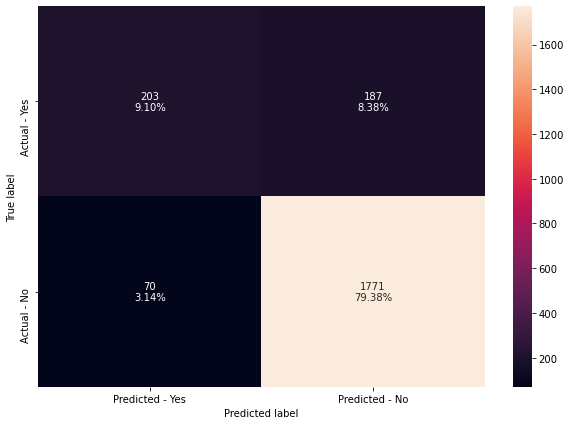

In [340]:
# Creating Confusion Matrix (CM) for the Classifer
make_confusion_matrix(log_regression,y_test)

### Model building - Bagging and Boosting
- Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models


In [341]:
# Creating bagging classifer and fitting training data
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [342]:
# Getting metric score of the classifer
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.99481068614261
Accuracy on test set :  0.94666069027342
Recall on training set :  0.9735632183908046
Recall on test set :  0.8025641025641026
Precision on training set :  0.9952996474735605
Precision on test set :  0.8816901408450705


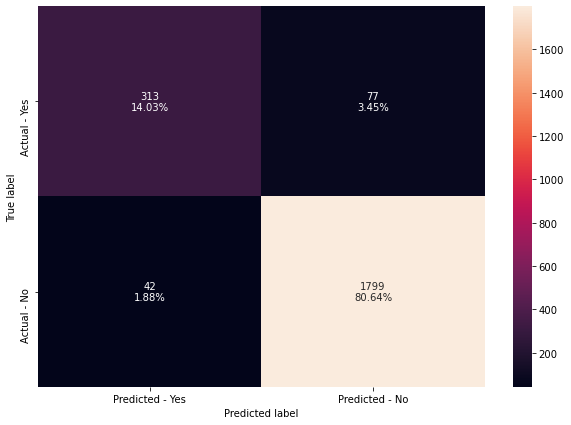

In [343]:
# Creating Confusion Matrix (CM) for the Classifer
make_confusion_matrix(bagging_estimator,y_test)

In [344]:
# Creating decision tree classifer and fitting training data
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
dTree

DecisionTreeClassifier(random_state=1)

In [345]:
dtree_estimator_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9421783953384133
Recall on training set :  1.0
Recall on test set :  0.8307692307692308
Precision on training set :  1.0
Precision on test set :  0.8372093023255814


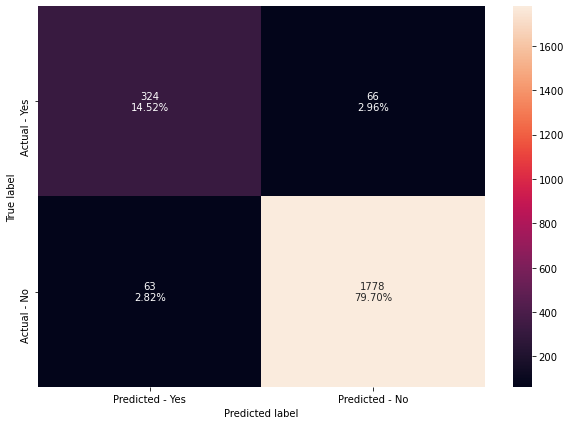

In [346]:
make_confusion_matrix(dTree,y_test)

In [347]:
# Creating random forest classifer and fitting training data
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [348]:
# Getting metric score of the classifer
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9610040340654415
Recall on training set :  1.0
Recall on test set :  0.8282051282051283
Precision on training set :  1.0
Precision on test set :  0.9416909620991254


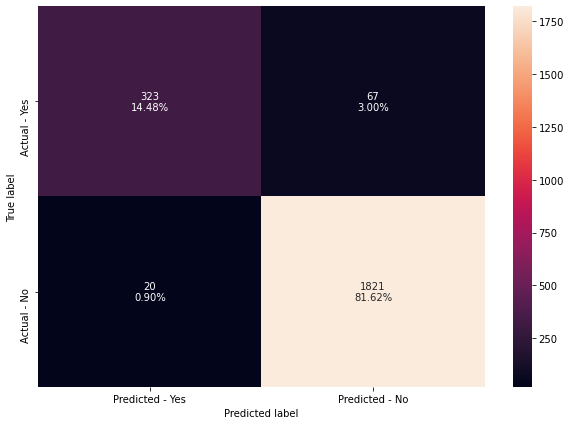

In [349]:
#Creating confusion matrix for the classifer
make_confusion_matrix(rf_estimator,y_test)

In [350]:
# Creating Adaptive boosting classifer and fitting training data
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [353]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.9565635210455506
Accuracy on test set :  0.9619004930524429
Recall on training set :  0.8494252873563218
Recall on test set :  0.8615384615384616
Precision on training set :  0.8860911270983214
Precision on test set :  0.9155313351498637


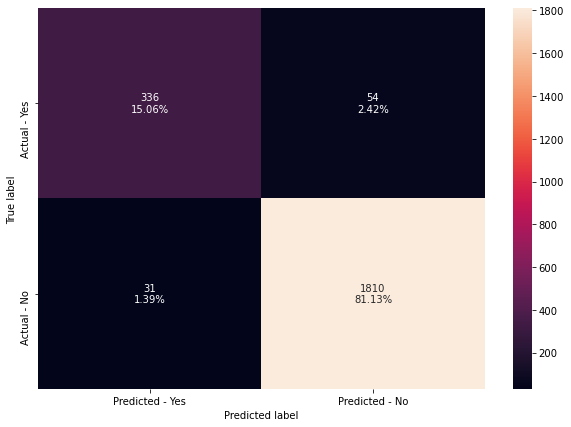

In [354]:
make_confusion_matrix(abc,y_test)

In [355]:
# Creating gradient boosting classifer and fitting training data
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [356]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9682875264270613
Accuracy on test set :  0.9601075750784401
Recall on training set :  0.8735632183908046
Recall on test set :  0.8307692307692308
Precision on training set :  0.9325153374233128
Precision on test set :  0.9337175792507204


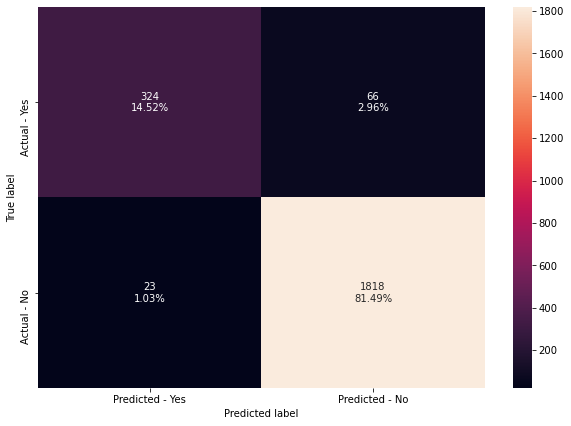

In [357]:
make_confusion_matrix(gbc,y_test)

In [358]:
# Creating XG boosting classifer and fitting training data
warnings.filterwarnings(action='ignore')
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[23:51:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [359]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9704168534289557
Recall on training set :  1.0
Recall on test set :  0.882051282051282
Precision on training set :  1.0
Precision on test set :  0.945054945054945


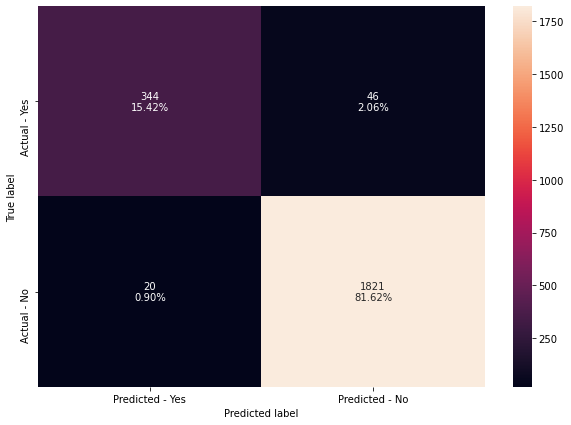

In [360]:
make_confusion_matrix(xgb,y_test)

In [361]:
# defining list of models
models = [bagging_estimator, rf_estimator,dTree, abc, gbc, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    #print(type(model))
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [362]:
comparison_frame = pd.DataFrame({'Model':['Bagging Classifier',
                                          'Random Forest', 'Decision Tree',
                                          'AdaBoost with default paramters', 
                                          'Gradient Boosting with default parameters',
                                          'XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging Classifier,0.990000,0.950000,0.970000,0.800000,1.000000,0.880000
1,Random Forest,1.000000,0.960000,1.000000,0.830000,1.000000,0.940000
2,Decision Tree,1.000000,0.940000,1.000000,0.830000,1.000000,0.840000
3,AdaBoost with default paramters,0.960000,0.960000,0.850000,0.860000,0.890000,0.920000
4,Gradient Boosting with default parameters,0.970000,0.960000,0.870000,0.830000,0.930000,0.930000
5,XGBoost with default parameters,1.000000,0.970000,1.000000,0.880000,1.000000,0.950000


### Best three models
1. Bagging Classifer
2. Random Forest
3. Decision Tree

### Hyperparameter tuning using grid search
- Tune the best 3 models using grid search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning


In [437]:
#Hyperparameter tuning for Bagging Classifer using make_pipeline.
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

bagging_estimator_tuned = make_pipeline(StandardScaler(), 
                    GridSearchCV(BaggingClassifier(),
                                 param_grid=parameters,
                                 cv=2,
                                 refit=True))
#print(parameters)
bagging_estimator_tuned.fit(X_train, y_train)
bagging_estimator_tuned_score =get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9967326542379397
Accuracy on test set :  0.9601075750784401
Recall on training set :  0.9839080459770115
Recall on test set :  0.8435897435897436
Precision on training set :  0.9965075669383003
Precision on test set :  0.9215686274509803


Hello


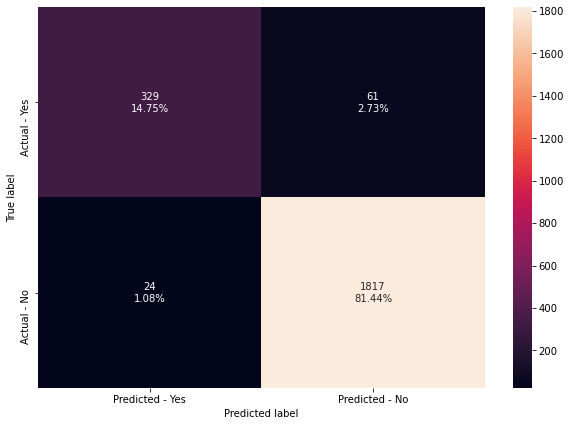

In [432]:
#Confusion Matrix for Bagging Classifer Tuned
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [438]:
#Hyperparameter tuning for Random Forest Classifer using make_pipeline.
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }


rf_estimator_tuned = make_pipeline(StandardScaler(), 
                    GridSearchCV(RandomForestClassifier(),
                                 param_grid=parameters,
                                 cv=2,
                                 refit=True))
#print(parameters)
rf_estimator_tuned.fit(X_train, y_train)
rf_estimator_tuned_score =get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.969632904093792
Accuracy on test set :  0.9574181981174361
Recall on training set :  0.8781609195402299
Recall on test set :  0.8512820512820513
Precision on training set :  0.9362745098039216
Precision on test set :  0.8997289972899729


Hello


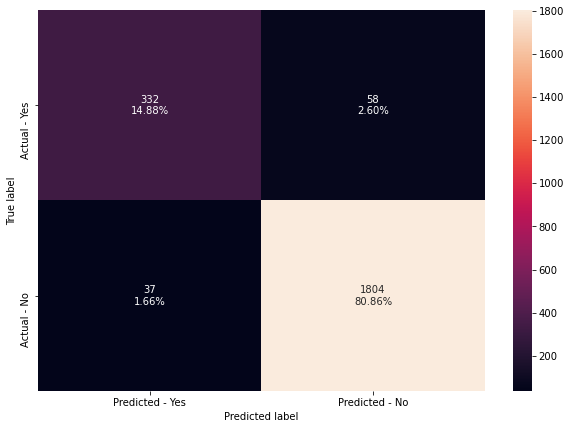

In [439]:
#Confusion Matrix for Random Forest Classifer Tuned
make_confusion_matrix(rf_estimator_tuned,y_test)

In [458]:
#Hyperparameter tuning for Decision Tree Classifer using make_pipeline.
parameters = {"max_depth": np.arange(1, 4),
              "max_features": np.arange(0.2, 0.7, 0.1),
              "min_samples_leaf": np.arange(5, 10),
              "criterion": ["gini", "entropy"]}


dtree_tuned = make_pipeline(StandardScaler(), 
                    GridSearchCV(DecisionTreeClassifier(),
                                 param_grid=parameters,
                                 cv=2,
                                 refit=True))
#print(parameters)
dtree_tuned.fit(X_train, y_train)
dtree_tuned_score =get_metrics_score(dtree_tuned)

Accuracy on training set :  0.9064001537574476
Accuracy on test set :  0.9112505602868669
Recall on training set :  0.8045977011494253
Recall on test set :  0.8102564102564103
Precision on training set :  0.688298918387414
Precision on test set :  0.7181818181818181


Hello


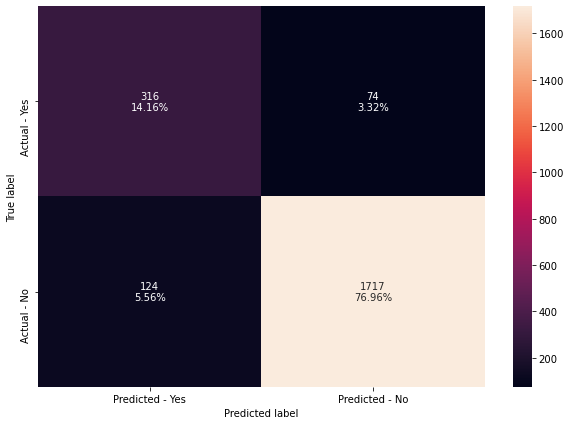

In [459]:
#Confusion Matrix for Random Forest Classifer Tuned
make_confusion_matrix(dtree_tuned,y_test)

### Hyperparameter tuning using random search
- Tune the best 3 models using random search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning


In [453]:
#Hyperparameter tuning for Random Forest Classifer using RandomsearchCV with Pipelines.
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }


rf_estimator_tuned_rs = make_pipeline(StandardScaler(), 
                    RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=parameters,
                                 cv=2,
                                 refit=True))
#print(parameters)
rf_estimator_tuned_rs.fit(X_train, y_train)
rf_estimator_tuned_rs_score =get_metrics_score(rf_estimator_tuned_rs)

Accuracy on training set :  0.9634826061887373
Accuracy on test set :  0.9560735096369342
Recall on training set :  0.8655172413793103
Recall on test set :  0.8487179487179487
Precision on training set :  0.9116222760290557
Precision on test set :  0.8945945945945946


Hello


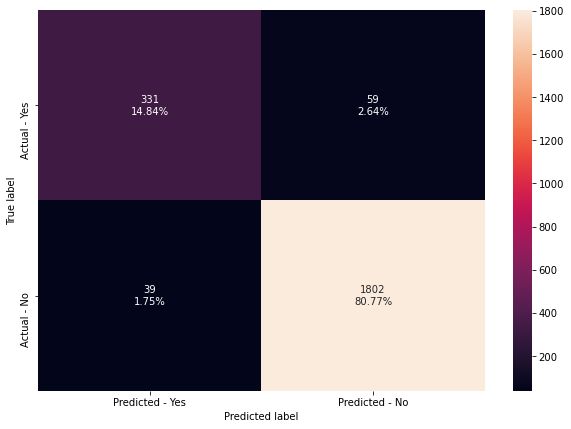

In [454]:
#Confusion Matrix for Random Forest Classifer Tuned
make_confusion_matrix(rf_estimator_tuned_rs,y_test)

In [456]:
#Hyperparameter tuning for Bagging Classifer using make_pipeline.
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

bagging_estimator_tuned_rs = make_pipeline(StandardScaler(), 
                    RandomizedSearchCV(BaggingClassifier(),
                                 param_distributions=parameters,
                                 cv=2,
                                 refit=True))
#print(parameters)
bagging_estimator_tuned_rs.fit(X_train, y_train)
bagging_estimator_tuned_rs_score =get_metrics_score(bagging_estimator_tuned_rs)

Accuracy on training set :  0.9963482606188737
Accuracy on test set :  0.9551770506499327
Recall on training set :  0.9804597701149426
Recall on test set :  0.8333333333333334
Precision on training set :  0.9976608187134502
Precision on test set :  0.9027777777777778


Hello


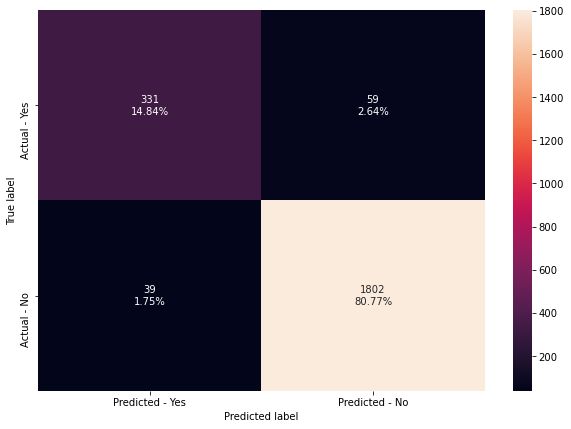

In [457]:
#Confusion Matrix for Random Forest Classifer Tuned using Random Serch
make_confusion_matrix(rf_estimator_tuned_rs,y_test)

In [460]:
#Hyperparameter tuning for Decision Classifer using make_pipeline with Random Search CV
parameters = {"max_depth": np.arange(1, 4),
              "max_features": np.arange(0.2, 0.7, 0.1),
              "min_samples_leaf": np.arange(5, 10),
              "criterion": ["gini", "entropy"]}

dtree_tuned_rs = make_pipeline(StandardScaler(), 
                    RandomizedSearchCV(DecisionTreeClassifier(),
                                 param_distributions=parameters,
                                 cv=2,
                                 refit=True))
#print(parameters)
dtree_tuned_rs.fit(X_train, y_train)
dtree_tuned_rs_score =get_metrics_score(dtree_tuned_rs)

Accuracy on training set :  0.9006342494714588
Accuracy on test set :  0.9004930524428507
Recall on training set :  0.735632183908046
Recall on test set :  0.7128205128205128
Precision on training set :  0.6903991370010788
Precision on test set :  0.7164948453608248


Hello


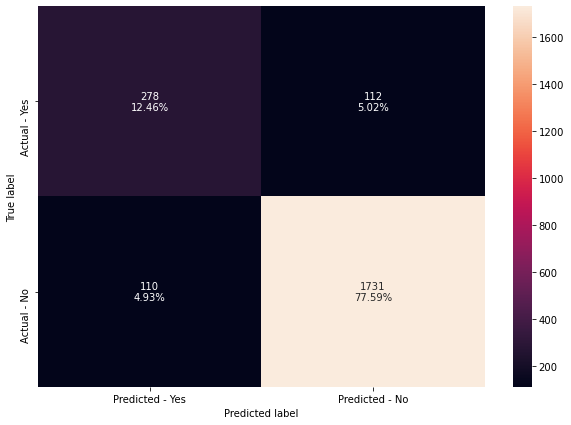

In [462]:
#Confusion Matrix for Random Forest Classifer Tuned using Random Serch
make_confusion_matrix(dtree_tuned_rs,y_test)

### Model Performances
- Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization


In [478]:
# defining list of models
models = [bagging_estimator_tuned, bagging_estimator_tuned_rs,
          rf_estimator_tuned, rf_estimator_tuned_rs,
          dtree_tuned, dtree_tuned_rs
         ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    #print(type(model))
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [479]:
comparison_frame = pd.DataFrame({'Model':[
                                          'Bagging Classifier Tuned with GridSearch CV',
                                          'Bagging Classifier Tuned with RandomSearch CV',
                                        
                                          'Random Forest Tuned with GridSearch CV', 
                                          'Random Forest Tuned with RandomSearch CV', 
                                          
                                    
                                          'Decision Tree Tuned with GridSearch CV',
                                          'Decision Tree Tuned with RandomSearch CV'],
                                 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging Classifier Tuned with GridSearch CV,1.000000,0.960000,0.980000,0.840000,1.000000,0.920000
1,Bagging Classifier Tuned with RandomSearch CV,1.000000,0.960000,0.980000,0.830000,1.000000,0.900000
2,Random Forest Tuned with GridSearch CV,0.970000,0.960000,0.870000,0.840000,0.920000,0.900000
3,Random Forest Tuned with RandomSearch CV,0.960000,0.960000,0.870000,0.850000,0.910000,0.890000
4,Decision Tree Tuned with GridSearch CV,0.910000,0.910000,0.800000,0.810000,0.690000,0.720000
5,Decision Tree Tuned with RandomSearch CV,0.900000,0.900000,0.740000,0.710000,0.690000,0.720000


### Actionable Insights & Recommendations
- Business recommendations and insights
With this classification models that are hypertuned, these models are able to predict whether the customer can be potentially attrited or retained based on the transactions behaviours available from the data. The predictions are able to predict relatively well as recall % in train and test data ranging upto 96% and 84% respectively. 